# ---------------------------------------------------------------

### Regresión lineal en el conjunto de datos de vivienda de Boston

#--------------------------------------------------------------------------------------------------------
# Primero: Identifiquemos loc campos a analizar 
#--------------------------------------------------------------------------------------------------------

Data fields Here's a brief version of what you'll find in the data description file:

**SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.  
**OverallQual** - Overall material and finish quality, rates the overall material and finish of the house  
   10   Very Excellent  
   9    Excellent  
   8    Very Good  
   7    Good  
   6    Above Average  
   5    Average  
   4    Below Average  
   3    Fair  
   2    Poor  
   1    Very Poor  
   
**1stFlrSF** - First Floor square feet  
**TotRmsAbvGrd** - Total rooms above grade (does not include bathrooms)  
**YearBuilt** - Original construction date  
**LotFrontage** - Linear feet of street connected to property  

In [305]:
#--------------------------------------------------------------------------------------------------------
# Segundo: importaremos las bibliotecas necesarias 
#--------------------------------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn import linear_model
from sklearn.model_selection import train_test_split

%matplotlib inline


In [306]:
#--------------------------------------------------------------------------------------------------------
# A continuación, cargaremos los datos de vivienda de la biblioteca scikit-learn y los entenderemos.
#--------------------------------------------------------------------------------------------------------
datos = np.load("proyecto_training_data.npy")
datosnumpy = np.load("proyecto_training_data.npy")
df=pd.DataFrame(datos,columns=["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"])


In [307]:
#--------------------------------------------------------------------------------------------------------
# Veamos como quedaron ordenados los datos con sus encabezados .
#--------------------------------------------------------------------------------------------------------
df.head()


,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [308]:
#--------------------------------------------------------------------------------------------------------
# Veamos la estadística descriptiva de los datos 
#--------------------------------------------------------------------------------------------------------
df.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [310]:
#--------------------------------------------------------------------------------------------------------
# Asignar los datos de correlación
#--------------------------------------------------------------------------------------------------------
matriz_corr = df.corr()
datos_corr = matriz_corr.iloc[0,:]
qual_corr = datos_corr[1]
piso_corr = datos_corr[2]
cuarto_corr = datos_corr[3]
anio_corr = datos_corr[4]
lot_corr = datos_corr[5]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014901337E88>,
      dtype=object)

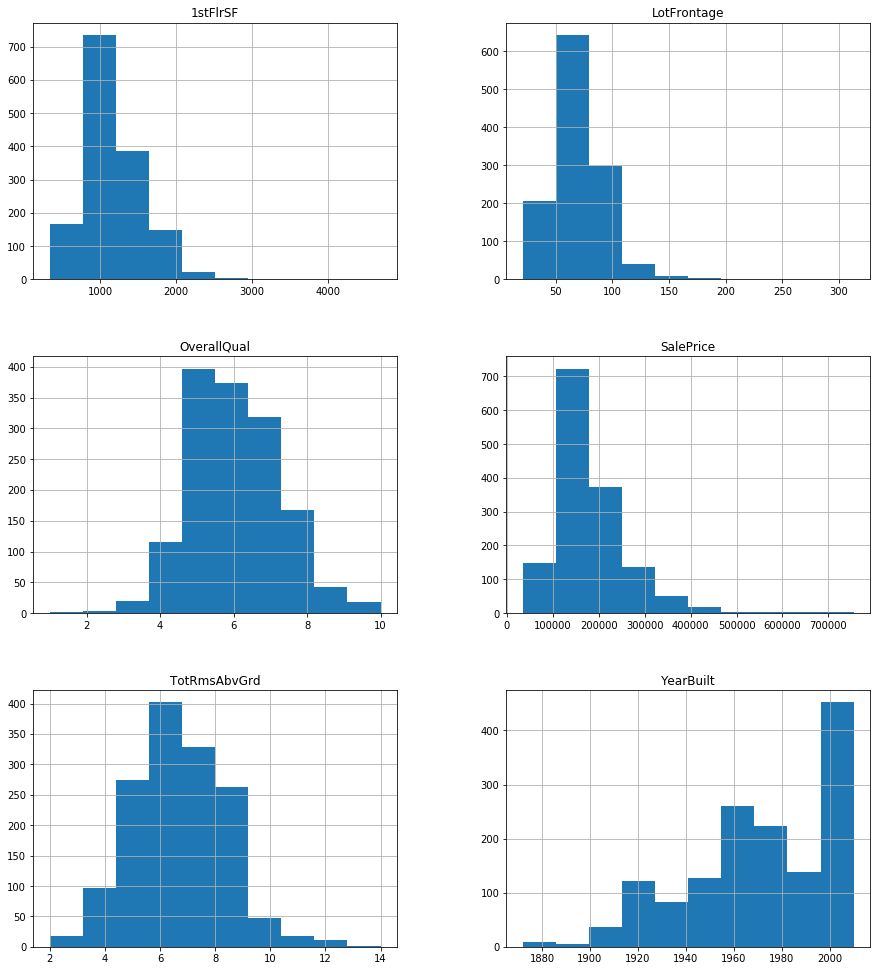

In [311]:
#--------------------------------------------------------------------------------------------------------
# Graficar los histogramas de las 6 variables incluyendo "y" (SalePrice)
#--------------------------------------------------------------------------------------------------------
df.hist(figsize=(15,17))

In [ ]:
#--------------------------------------------------------------------------------------------------------
# Graficar los histogramas combinados de las 5 variables exceptuando "y" (SalePrice)
#--------------------------------------------------------------------------------------------------------

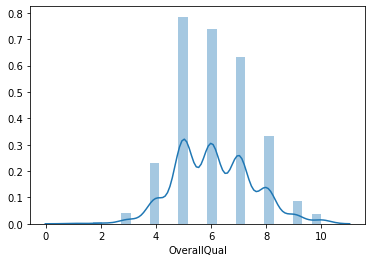

In [312]:
sns.distplot(df["OverallQual"])

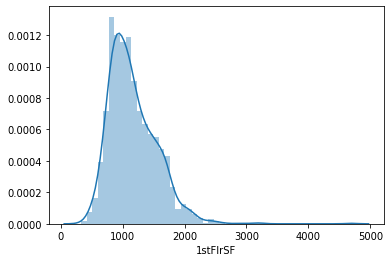

In [313]:
sns.distplot(df["1stFlrSF"])

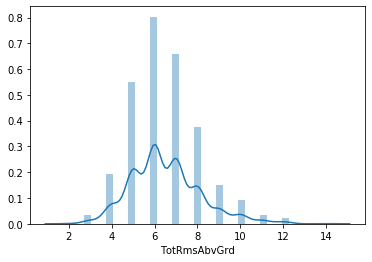

In [314]:
sns.distplot(df["TotRmsAbvGrd"])

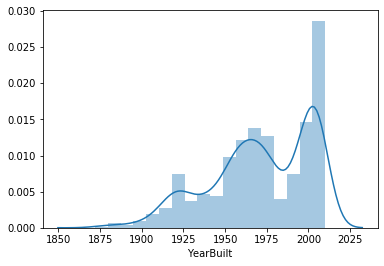

In [315]:
sns.distplot(df["YearBuilt"])

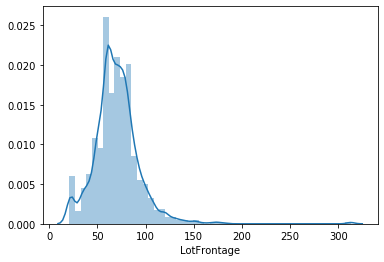

In [316]:
sns.distplot(df["LotFrontage"])

In [317]:
#--------------------------------------------------------------------------------------------------------
# Asignando la variable "y" (SalePrice)
#--------------------------------------------------------------------------------------------------------
y=df["SalePrice"]

In [318]:
#--------------------------------------------------------------------------------------------------------
# Eliminando la variable "y" (SalePrice) del data frame
#--------------------------------------------------------------------------------------------------------
df.drop(["SalePrice"],axis=1,inplace=True) 

In [319]:
#--------------------------------------------------------------------------------------------------------
# Asignando el rango de datos de entrenamiento para X y para Y 
#--------------------------------------------------------------------------------------------------------
X=datosnumpy[:,1:]
y=datosnumpy[:,0]
X.shape

(1460, 5)

In [320]:
#--------------------------------------------------------------------------------------------------------
# Haciendo el Split del 80-20
#--------------------------------------------------------------------------------------------------------
spl=0.8
n=len(y)
sample=int(spl*n)

In [321]:
#--------------------------------------------------------------------------------------------------------
# tomar de 0 a 80% - tomar de 80% en adelante 
#--------------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = X[:sample,:],X[sample:,:], y[:sample],y[sample:] 
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [322]:
#--------------------------------------------------------------------------------------------------------
# Asignar los nombres de las variables que vamos a comparar (Parte de las iteracciones) 
#--------------------------------------------------------------------------------------------------------
oqtrain=X_train[:,0].reshape(-1,1)
oqtest=X_test[:,0].reshape(-1,1)
pisotrain=X_train[:,1].reshape(-1,1)
pisotest=X_test[:,1].reshape(-1,1)
cuartotrain=X_train[:,2].reshape(-1,1)
cuartotest=X_test[:,2].reshape(-1,1)
aniotrain=X_train[:,3].reshape(-1,1)
aniotest=X_test[:,3].reshape(-1,1)
piestrain=X_train[:,4].reshape(-1,1)
piestest=X_test[:,4].reshape(-1,1)

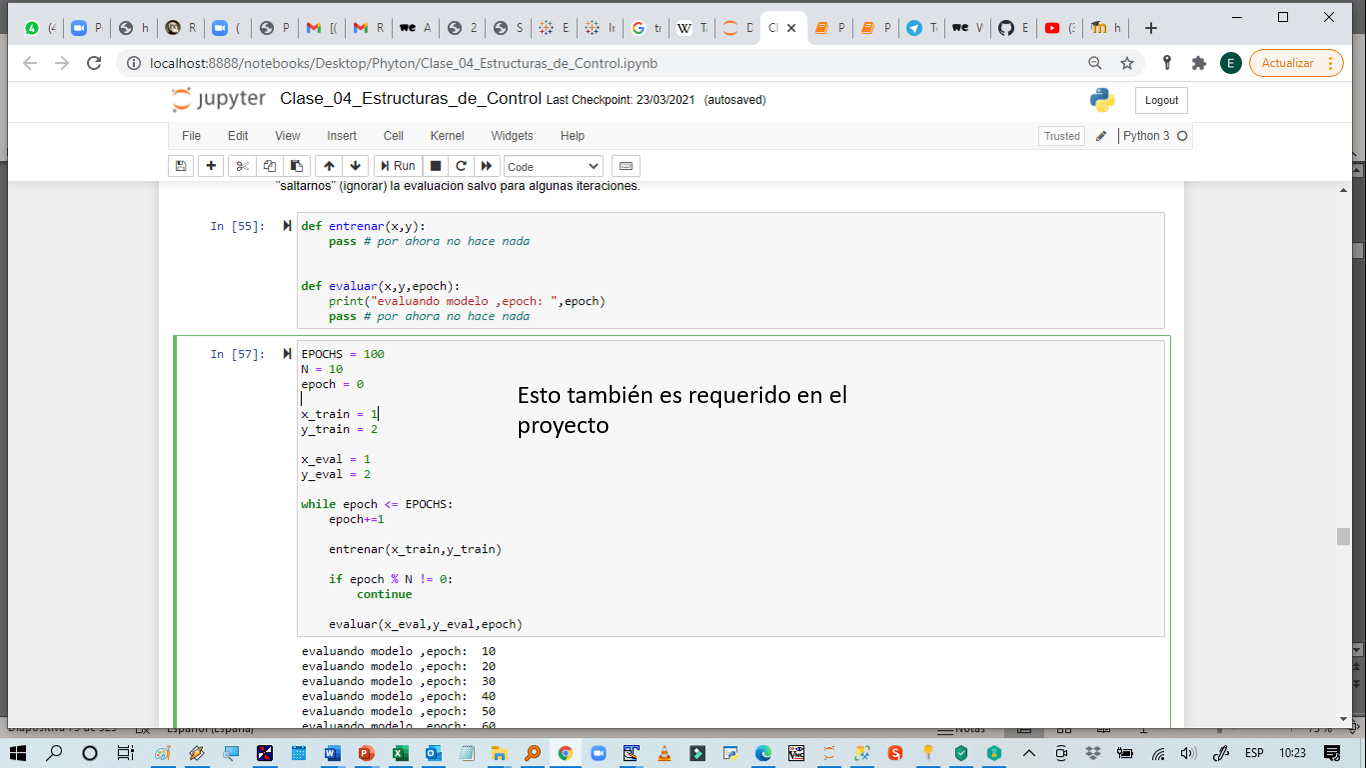

In [323]:
#--------------------------------------------------------------------------------------------------------
# Construir la función de costos  
#--------------------------------------------------------------------------------------------------------
def funcion_costo(X, y, theta):
    h = X @ theta
    return ((y - h) ** 2).sum() / (2 * len(X))

In [324]:
#--------------------------------------------------------------------------------------------------------
# Construir la función de costo gradiente 
#--------------------------------------------------------------------------------------------------------
def costo_gradiente(X, y, theta):
    h = X @ theta
    return (X.T @ (h - y)) / len(X)

In [325]:
#--------------------------------------------------------------------------------------------------------
# Construir la función de descenco gradiente (importante mantener a la vista la columna de unos) 
#--------------------------------------------------------------------------------------------------------
def descenso_gradiente(X, y, linear_function, linear_gradient, learning_rate=0.0000001, threshold= 2, 
                        max_iter=1000, imprimir_error_cada=None):
                        
    theta = np.random.rand(2,1)
    iteration = 0
    costs = []
    thetas = []
    n=len(X)
    columna_unos=np.ones((n,1))
    X = np.hstack((columna_unos,X))

    while np.linalg.norm(linear_gradient(X, y, theta)) > threshold and iteration < max_iter:
        iteration += 1
        theta = theta - learning_rate * linear_gradient(X, y, theta)
        costs.append(linear_function(X, y, theta))
        thetas.append(theta.copy())
        
        if imprimir_error_cada != None:
            if iteration%imprimir_error_cada == 0:
                print(costs[iteration-1])
                
    return thetas, costs


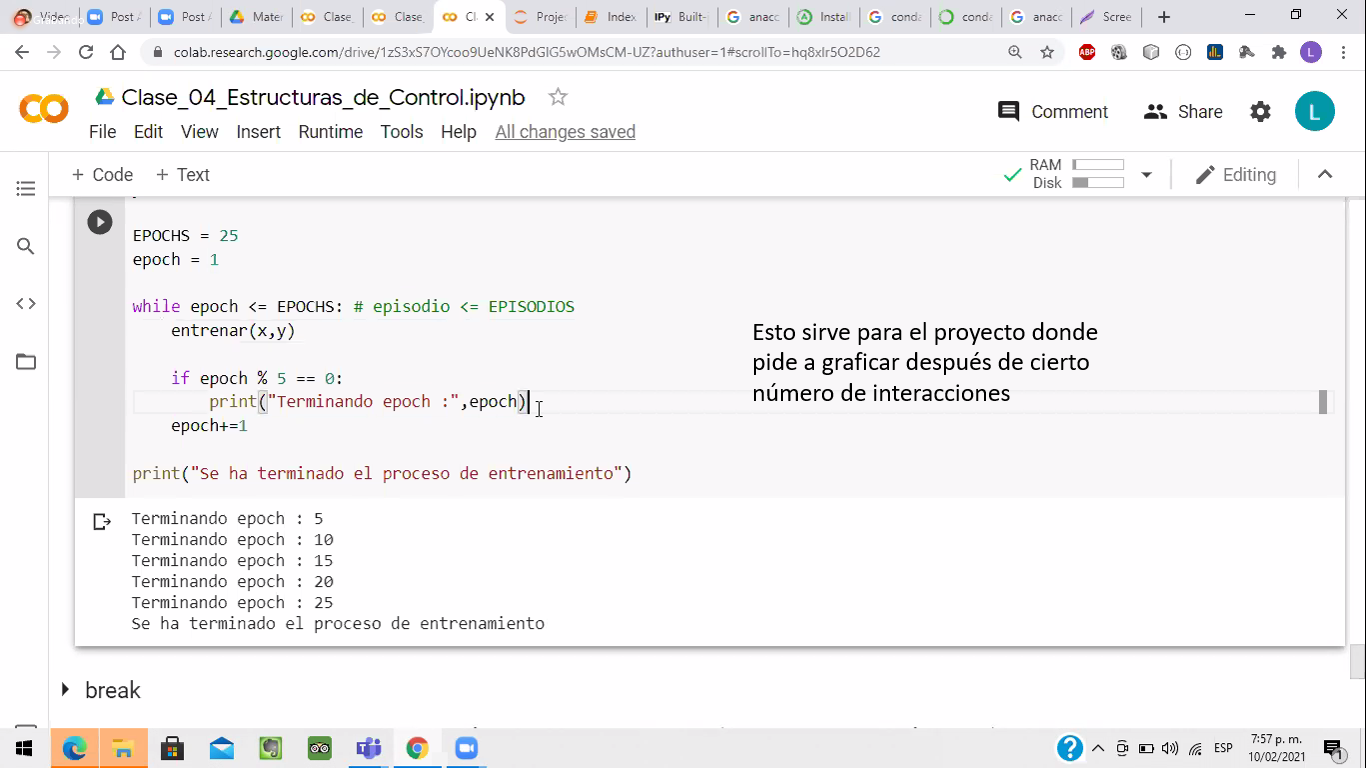

In [326]:
#--------------------------------------------------------------------------------------------------------
# Parte de las iteracciones (500 significa dos gráficos)
#--------------------------------------------------------------------------------------------------------
# oqtrain(1Tr), oqtest(1Te) (OverallQual)
# pisotrain(2Tr), pisotest(2Te) (1stFlrSF)
# cuartotrain(3Tr), cuartotest(3Te) (TotRmsAbvGrd)
# aniotrain(4Tr), aniotest(4Te) (YearBuilt)
# piestrain(5Tr), piestest(5Te) (LotFrontage)
#--------------------------------------------------------------------------------------------------------
# Construir la función para graficar los costos
#--------------------------------------------------------------------------------------------------------
def graficar_costos(costos):
    xrow = np.arange(0,len(costos),1).reshape(-1,1)
    plt.scatter(xrow, costos)
    plt.ylabel("Costos")
    plt.xlabel("Iteraciones")
    plt.title("Gráfica de Costos")
    plt.show()

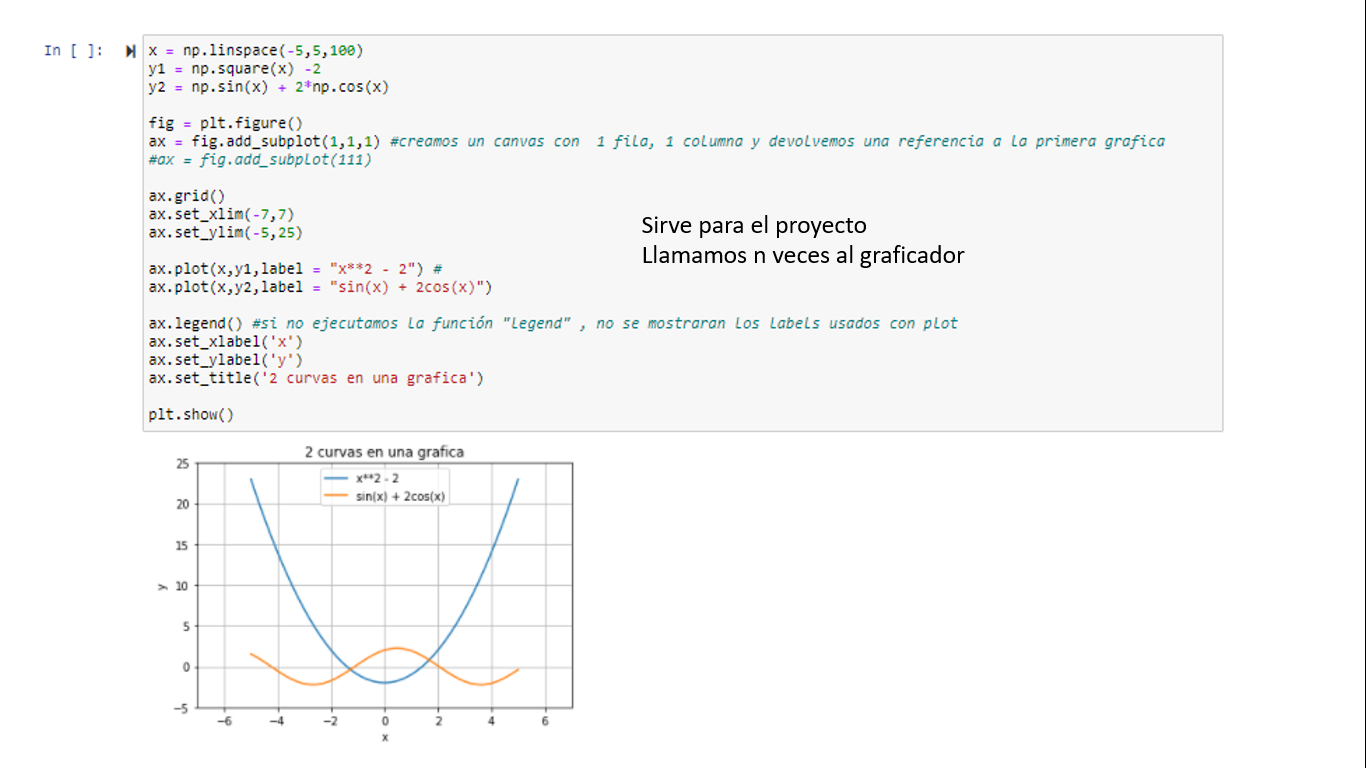

In [ ]:
#--------------------------------------------------------------------------------------------------------
# Parte de las iteracciones (500 significa dos gráficos)
#--------------------------------------------------------------------------------------------------------

In [327]:
# (OverallQual)
theta_arr_1Tr, costos_arr_1Tr = descenso_gradiente(oqtrain, y_train, funcion_costo, costo_gradiente, 
                                                   imprimir_error_cada=500, learning_rate=0.000000001)

19408842742.29781
19408120875.84149


In [328]:
# (1stFlrSF)
theta_arr_2Tr, costos_arr_2Tr = descenso_gradiente(pisotrain, y_train, funcion_costo, costo_gradiente, 
                                                   imprimir_error_cada=500, learning_rate=0.000000001)

5942668098.100182
2874875607.00511


In [329]:
# (TotRmsAbvGrd)
theta_arr_3Tr, costos_arr_3Tr = descenso_gradiente(cuartotrain, y_train, funcion_costo, costo_gradiente, 
                                                    imprimir_error_cada=500, learning_rate=0.000000001)

19407837975.805477
19407049539.203747


In [330]:
# (YearBuilt)
theta_arr_4Tr, costos_arr_4Tr = descenso_gradiente(aniotrain, y_train, funcion_costo, costo_gradiente, 
                                                   imprimir_error_cada=500, learning_rate=0.000000001)

3318319162.980891
2998117316.181103


In [331]:
# (LotFrontage)
theta_arr_4Tr, costos_arr_4Tr = descenso_gradiente(piestrain, y_train, funcion_costo, costo_gradiente, 
                                                   imprimir_error_cada=500, learning_rate=0.000000001)

In [ ]:
#--------------------------------------------------------------------------------------------------------
# Graficar costos para la variable 
#--------------------------------------------------------------------------------------------------------.

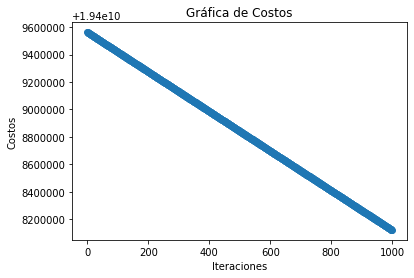

In [332]:
# (OverallQual)
graficar_costos(costos_arr_1Tr)

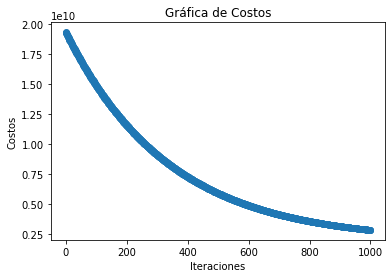

In [333]:
# (1stFlrSF)
graficar_costos(costos_arr_2Tr)

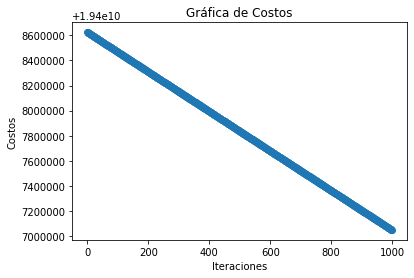

In [334]:
# (TotRmsAbvGrd)
graficar_costos(costos_arr_3Tr)

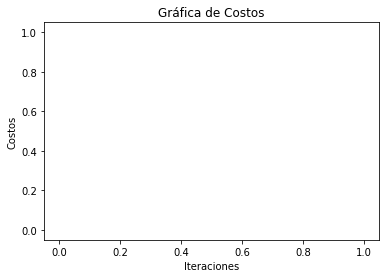

In [335]:
# (YearBuilt)
graficar_costos(costos_arr_4Tr)

In [336]:
# (LotFrontage)
graficar_costos(costos_arr_5Tr)

NameError: name 'costos_arr_5Tr' is not defined

In [337]:
#--------------------------------------------------------------------------------------------------------
# Construir la función para graficar los ajustes 
#--------------------------------------------------------------------------------------------------------
def graficar_ajuste(x_original, y_original, thetas, n_iteraciones, titulo = None):
    i = 0
    columna_unos=np.ones((len(x_original),1))
    x_original = np.hstack((columna_unos, x_original))
    while i <= len(thetas):
        i += 1
        if i%n_iteraciones == 0:
            plt.scatter(x_original[:,1], y_train)
            plt.plot(x_original[:,1], (x_original @ thetas[i-1]).reshape(-1,1), color='green')
            plt.title("Coef Corr: " + str(titulo))
            plt.show()

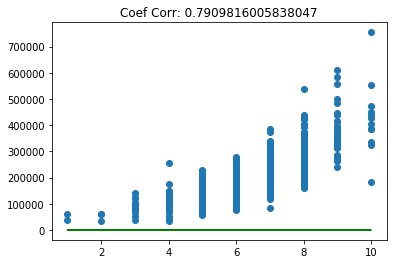

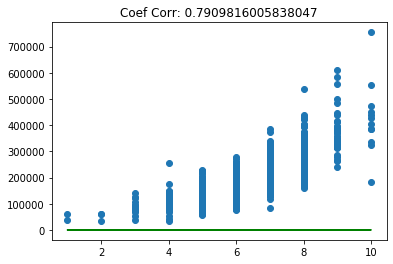

In [299]:
# (OverallQual)
graficar_ajuste(oqtrain, y_train, theta_arr_1Tr, n_iteraciones = 500, titulo = qual_corr)

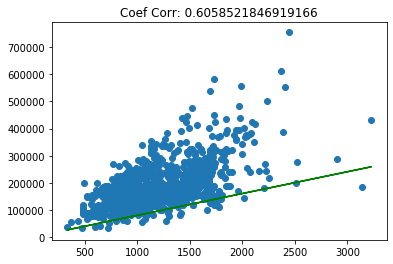

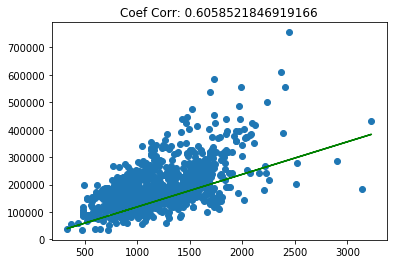

In [300]:
# (1stFlrSF)
graficar_ajuste(pisotrain, y_train, theta_arr_2Tr, n_iteraciones = 500, titulo = piso_corr)

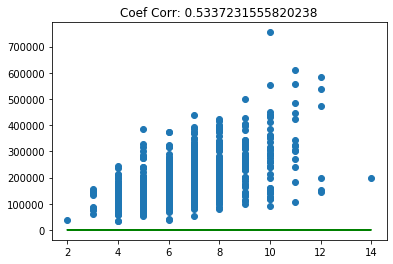

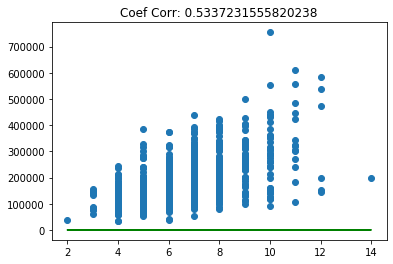

In [301]:
# (TotRmsAbvGrd)
graficar_ajuste(cuartotrain, y_train, theta_arr_3Tr, n_iteraciones = 500, titulo = cuarto_corr)

In [339]:
# (YearBuilt)
graficar_ajuste(aniotrain, y_train, theta_arr_4Tr, n_iteraciones = 500, titulo = anio_corr)

In [340]:
# (LotFrontage)
graficar_ajuste(piestrain, y_train, theta_arr_5Tr, n_iteraciones = 500, titulo = lot_corr)

NameError: name 'theta_arr_5Tr' is not defined

RESPUESTAS DE LUIS FERNANDO: 

    Buen día Erick, acá las respuestas:

**1. La primera parte solo se haría con la "X" escogida, no con todas las "X", ¿correcto?**   

A que se refiere la primera parte? si es a la de crear el modelo, sí solo es con las X elegidas, no todas las X

**2. ¿Se haría en funciones juntas, separadas o una función que reciba como parámetro otra función?**    

No hay restricción para esto, puede ser a elección de cada quien siempre que se cumpla con tener la función de comparación descrita en el enunciado.

**3. ¿Que significa la combinación promedio - es un promedio de la manual con la de scikit-learn?** 

Si, la predicción combinada es un promedio de la manual con la de sklearn

**4. ¿En la segunda parte lo del 20% lo hago con mi modelo o con el modelo de la máquina?** 

¿Cual parte específicamente? Hay algunas que se hacen con el manual, otras con el de sklearn y tambíen está la predicción combinada que usa ambas


In [ ]:
#--------------------------------------------------------------------------------------------------------
# posible función relacionada a comparar librerías vrs resultados 
#--------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
def funcion_final(x_arr_train, y_arr_train, x_arr_test, y_arr_train, user_thetas, regresion_lineal):
    machine_y = []
    y_user = x_arr @ user_thetas[-1]
    regresion_lineal.fit(x_arr_train, y_arr_train)
    
    for i in x_arr_train:
        regresion_lineal.predict(i) - 
    y_machine = regresion_lineal.predict(x_train)
    cost = np.sum((reg.predict(x) - y) ** 2)

In [ ]:
# funcion_final(theta_arr, )